# DDPG
Using StableBaseline3 DDPG implementation

## Imports

In [1]:
import random

from environment import TurbineEnvironment, plot_compare_episodes, simulate_closed_loop_episode, load_test_episode
from parameters import *
import matplotlib.pyplot as plt
from parameters import x_columns
import torch
import shutil

In [2]:
env = TurbineEnvironment()

In [3]:
case = 'case 1'
dataset_type = 'res'

## Seed

In [4]:
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False # also needed for deterministic
random.seed(seed)

## Load true episode

In [5]:
true_states, initial_state, true_actions = load_test_episode(case, dataset_type, 0)

# DDPG

## Train

In [6]:
from stable_baselines3 import DDPG

tensorboard_dir = output_directory / 'tensorboard'
tensorboard_dir.mkdir(exist_ok=True, parents=True)
tensorboard_dir = tensorboard_dir / "ddpg_turbine_tensorboard"
# clear tensorboard logs
try:
    shutil.rmtree(tensorboard_dir)
except:
    pass
model_ddpg = DDPG('MlpPolicy', env, tensorboard_log=tensorboard_dir, learning_rate=ddpg_learning_rate)
model_ddpg.learn(total_timesteps=ddpg_total_timesteps, log_interval=10, tb_log_name='ddpg_turbine', reset_num_timesteps=False)

print(f'tensorboard --logdir {tensorboard_dir.absolute().resolve()}')

tensorboard --logdir C:\Users\Romain\Documents\ML_project2\outputs\tensorboard\ddpg_turbine_tensorboard


## Save

In [7]:
model_ddpg.save(output_directory / 'models' / 'stablebaselines_ddpg')

## Test

In [8]:
states, actions, rewards = simulate_closed_loop_episode(env, model_ddpg, initial_state)
actions = np.array(actions).reshape(-1)

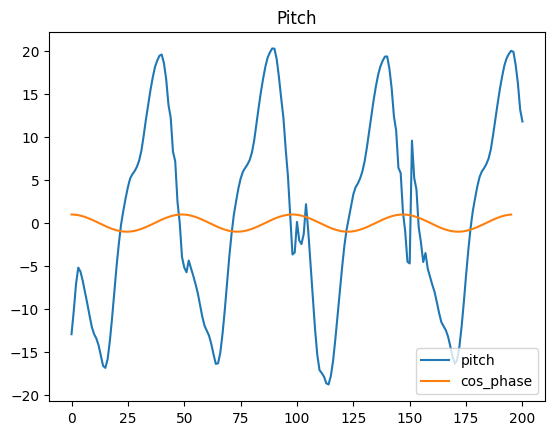

In [9]:
plt.plot(np.rad2deg(states[x_columns.index('pitch')]), label='pitch')
plt.plot(list(true_states[x_columns.index('cos_phase')]) * 4, label='cos_phase')
plt.legend()
plt.title('Pitch')
plt.show()

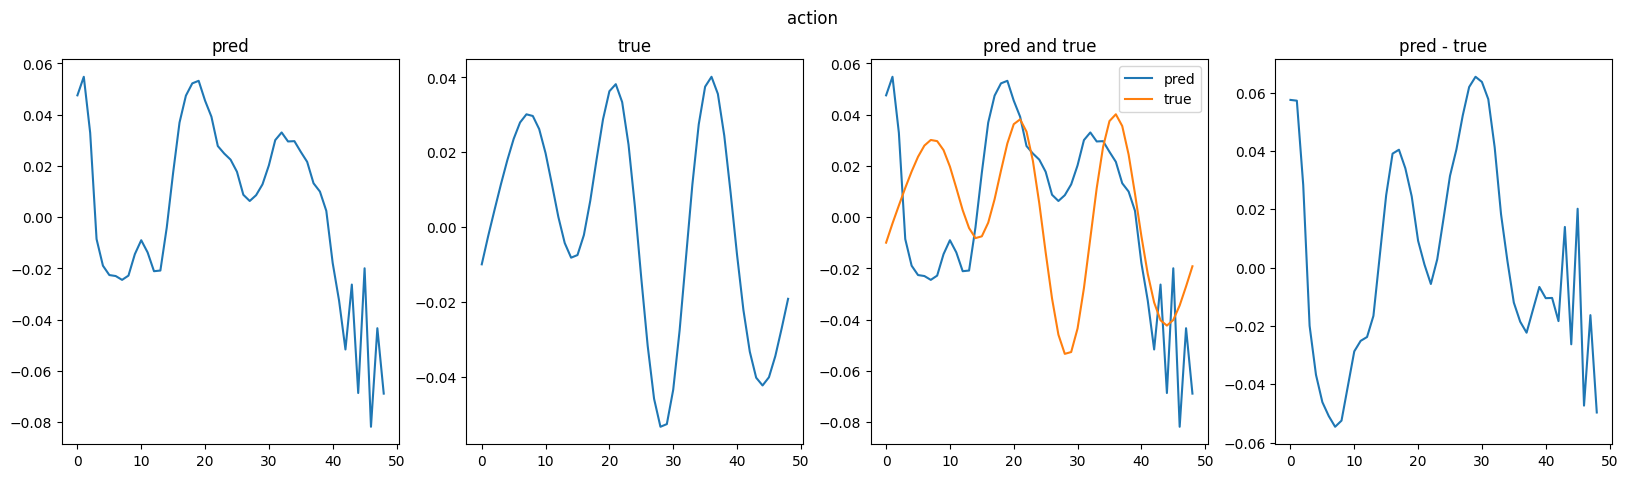

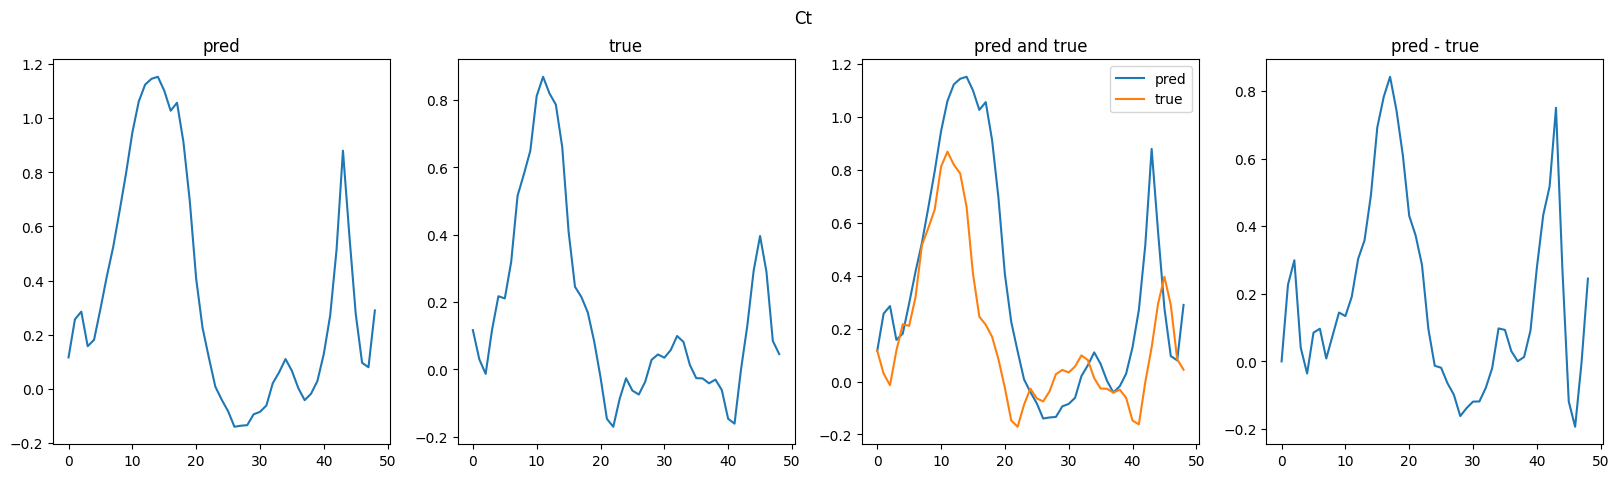

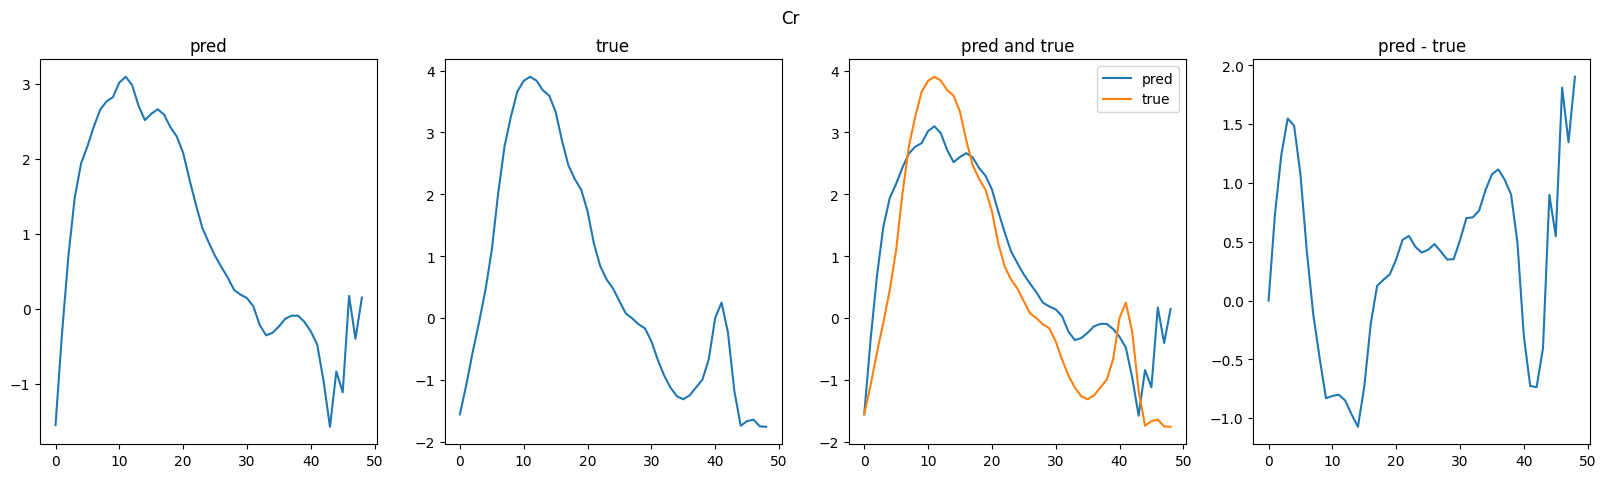

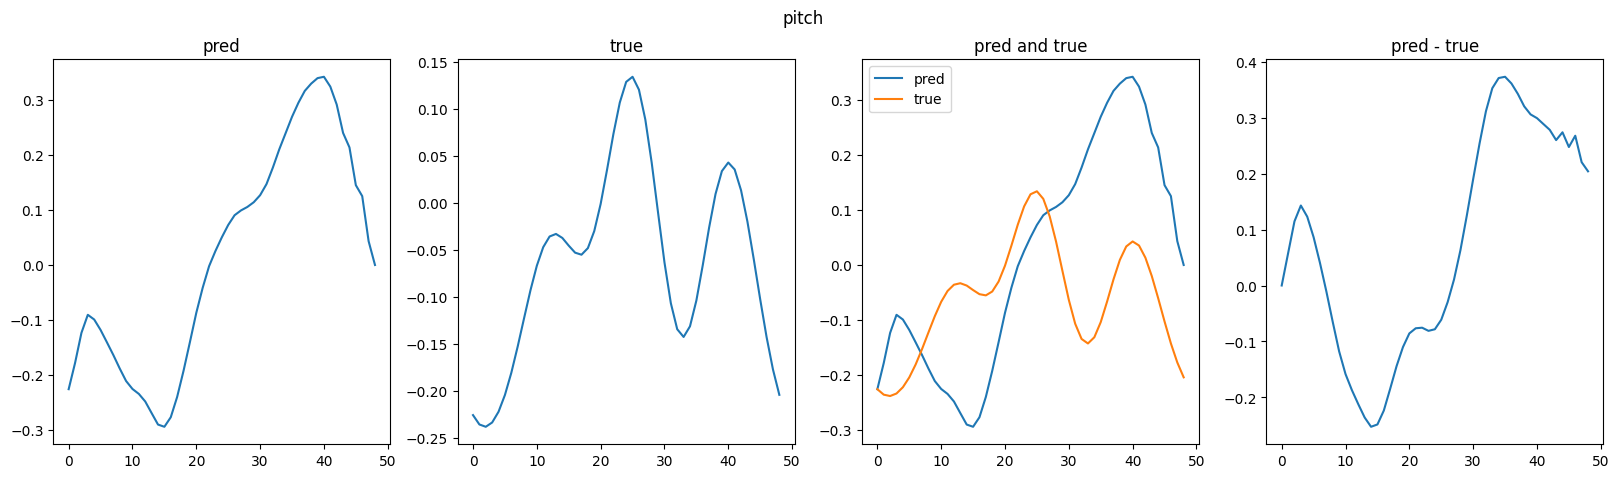

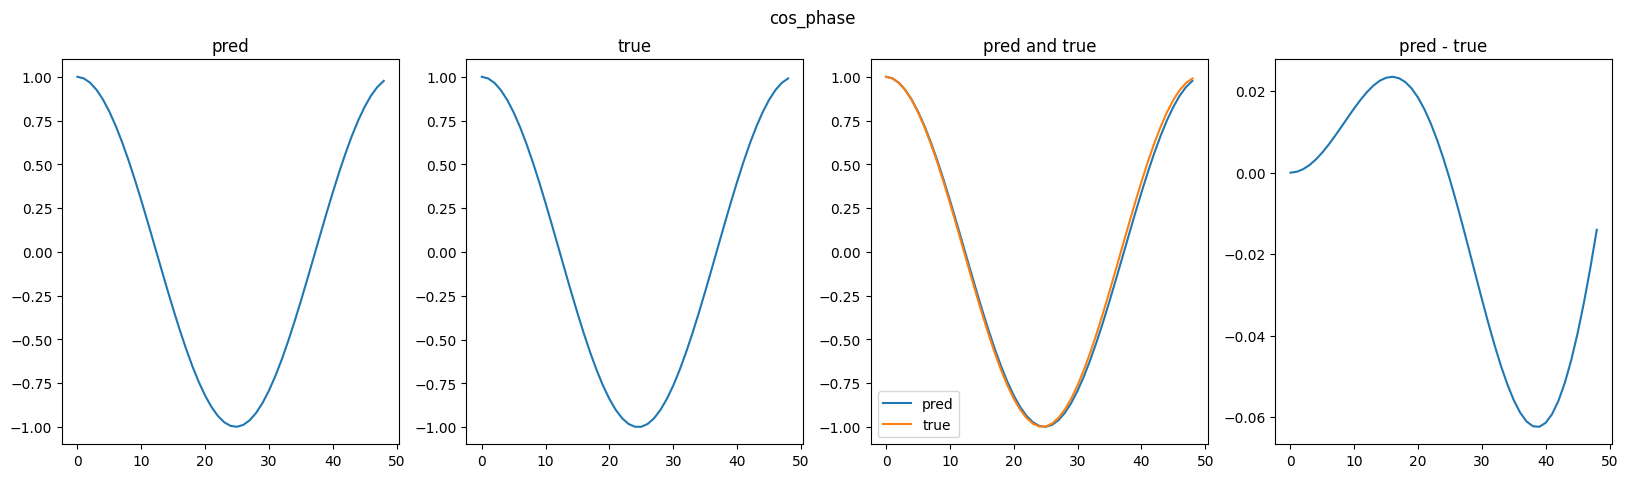

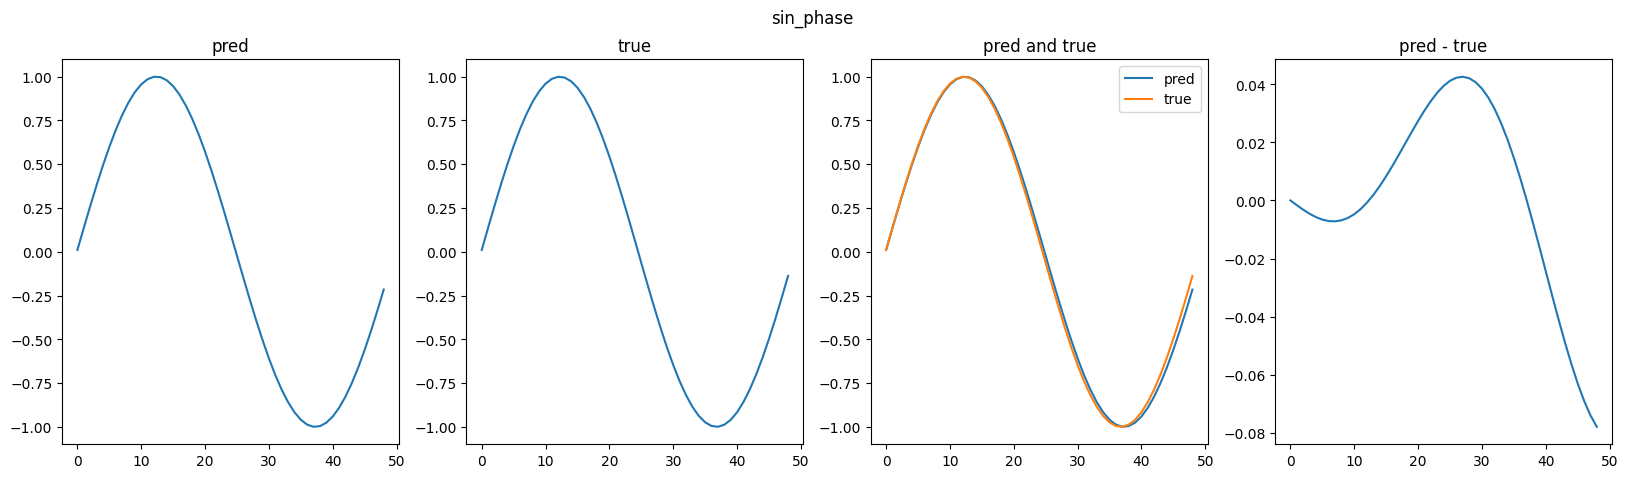

In [10]:
plot_compare_episodes(pred_states=states,
                      pred_actions=actions,
                      true_states=true_states,
                      true_actions=true_actions)